In [162]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,roc_auc_score

In [163]:
df=pd.read_csv('winequality-red.csv')

In [164]:
df.head(1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [165]:
df.shape

(1599, 12)

In [166]:
wine_data=df.copy()

In [167]:
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [168]:
wine_data.shape

(1599, 12)

In [169]:
wine_data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

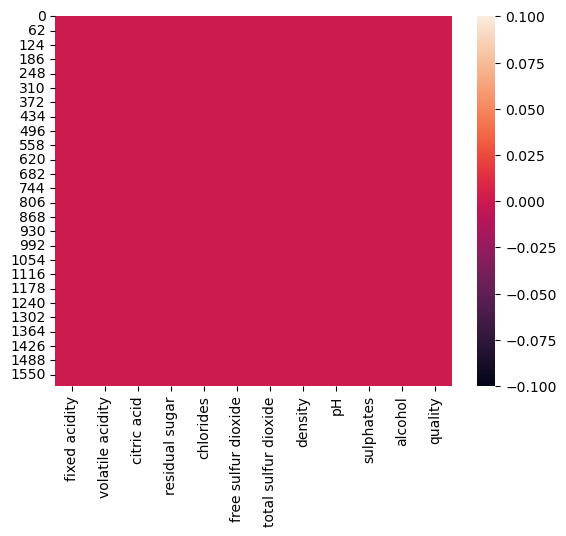

In [170]:
sns.heatmap(wine_data.isnull())
plt.show()

In [171]:
wine_data.head(1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [172]:
wine_data['fixed acidity'].unique()

array([ 7.4,  7.8, 11.2,  7.9,  7.3,  7.5,  6.7,  5.6,  8.9,  8.5,  8.1,
        7.6,  6.9,  6.3,  7.1,  8.3,  5.2,  5.7,  8.8,  6.8,  4.6,  7.7,
        8.7,  6.4,  6.6,  8.6, 10.2,  7. ,  7.2,  9.3,  8. ,  9.7,  6.2,
        5. ,  4.7,  8.4, 10.1,  9.4,  9. ,  8.2,  6.1,  5.8,  9.2, 11.5,
        5.4,  9.6, 12.8, 11. , 11.6, 12. , 15. , 10.8, 11.1, 10. , 12.5,
       11.8, 10.9, 10.3, 11.4,  9.9, 10.4, 13.3, 10.6,  9.8, 13.4, 10.7,
       11.9, 12.4, 12.2, 13.8,  9.1, 13.5, 10.5, 12.6, 14. , 13.7,  9.5,
       12.7, 12.3, 15.6,  5.3, 11.3, 13. ,  6.5, 12.9, 14.3, 15.5, 11.7,
       13.2, 15.9, 12.1,  5.1,  4.9,  5.9,  6. ,  5.5])

In [173]:
wine_data['volatile acidity'].unique()

array([0.7  , 0.88 , 0.76 , 0.28 , 0.66 , 0.6  , 0.65 , 0.58 , 0.5  ,
       0.615, 0.61 , 0.62 , 0.56 , 0.59 , 0.32 , 0.22 , 0.39 , 0.43 ,
       0.49 , 0.4  , 0.41 , 0.71 , 0.645, 0.675, 0.685, 0.655, 0.605,
       0.38 , 1.13 , 0.45 , 0.67 , 0.52 , 0.935, 0.29 , 0.31 , 0.51 ,
       0.42 , 0.63 , 0.69 , 0.735, 0.725, 0.705, 0.785, 0.75 , 0.625,
       0.3  , 0.55 , 1.02 , 0.775, 0.9  , 0.545, 0.575, 0.33 , 0.54 ,
       1.07 , 0.695, 1.33 , 0.745, 1.04 , 0.715, 0.415, 0.34 , 0.68 ,
       0.95 , 0.53 , 0.64 , 0.885, 0.805, 0.73 , 0.37 , 0.835, 1.09 ,
       0.57 , 0.44 , 0.635, 0.82 , 0.48 , 1.   , 0.21 , 0.35 , 0.975,
       0.26 , 0.87 , 0.18 , 0.27 , 0.2  , 0.36 , 0.83 , 0.46 , 0.47 ,
       0.77 , 0.815, 0.795, 0.665, 0.765, 0.24 , 0.85 , 0.84 , 0.96 ,
       0.78 , 0.23 , 0.315, 0.365, 0.25 , 0.825, 0.72 , 0.595, 0.585,
       0.915, 0.755, 0.845, 1.24 , 0.8  , 0.98 , 1.185, 0.92 , 1.035,
       1.025, 0.565, 0.74 , 1.115, 0.865, 0.875, 0.965, 0.91 , 0.89 ,
       1.01 , 0.305,

In [174]:
wine_data['citric acid'].unique()


array([0.  , 0.04, 0.56, 0.06, 0.02, 0.36, 0.08, 0.29, 0.18, 0.19, 0.28,
       0.51, 0.48, 0.31, 0.21, 0.11, 0.14, 0.16, 0.24, 0.07, 0.12, 0.25,
       0.09, 0.3 , 0.2 , 0.22, 0.15, 0.43, 0.52, 0.23, 0.37, 0.26, 0.57,
       0.4 , 0.49, 0.05, 0.54, 0.64, 0.7 , 0.47, 0.44, 0.17, 0.68, 0.53,
       0.1 , 0.01, 0.55, 1.  , 0.03, 0.42, 0.33, 0.32, 0.35, 0.6 , 0.74,
       0.58, 0.5 , 0.76, 0.46, 0.45, 0.38, 0.39, 0.66, 0.62, 0.67, 0.79,
       0.63, 0.61, 0.71, 0.65, 0.59, 0.34, 0.69, 0.73, 0.72, 0.41, 0.27,
       0.75, 0.13, 0.78])

In [175]:
wine_data['residual sugar'].unique()


array([ 1.9 ,  2.6 ,  2.3 ,  1.8 ,  1.6 ,  1.2 ,  2.  ,  6.1 ,  3.8 ,
        3.9 ,  1.7 ,  4.4 ,  2.4 ,  1.4 ,  2.5 , 10.7 ,  5.5 ,  2.1 ,
        1.5 ,  5.9 ,  2.8 ,  2.2 ,  3.  ,  3.4 ,  5.1 ,  4.65,  1.3 ,
        7.3 ,  7.2 ,  2.9 ,  2.7 ,  5.6 ,  3.1 ,  3.2 ,  3.3 ,  3.6 ,
        4.  ,  7.  ,  6.4 ,  3.5 , 11.  ,  3.65,  4.5 ,  4.8 ,  2.95,
        5.8 ,  6.2 ,  4.2 ,  7.9 ,  3.7 ,  6.7 ,  6.6 ,  2.15,  5.2 ,
        2.55, 15.5 ,  4.1 ,  8.3 ,  6.55,  4.6 ,  4.3 ,  5.15,  6.3 ,
        6.  ,  8.6 ,  7.5 ,  2.25,  4.25,  2.85,  3.45,  2.35,  2.65,
        9.  ,  8.8 ,  5.  ,  1.65,  2.05,  0.9 ,  8.9 ,  8.1 ,  4.7 ,
        1.75,  7.8 , 12.9 , 13.4 ,  5.4 , 15.4 ,  3.75, 13.8 ,  5.7 ,
       13.9 ])

In [176]:
wine_data['chlorides'].unique()


array([0.076, 0.098, 0.092, 0.075, 0.069, 0.065, 0.073, 0.071, 0.097,
       0.089, 0.114, 0.176, 0.17 , 0.368, 0.086, 0.341, 0.077, 0.082,
       0.106, 0.084, 0.085, 0.08 , 0.105, 0.083, 0.103, 0.066, 0.172,
       0.074, 0.088, 0.332, 0.05 , 0.054, 0.113, 0.068, 0.081, 0.11 ,
       0.07 , 0.111, 0.079, 0.115, 0.094, 0.093, 0.104, 0.464, 0.401,
       0.062, 0.107, 0.045, 0.058, 0.102, 0.467, 0.091, 0.122, 0.09 ,
       0.119, 0.178, 0.146, 0.072, 0.118, 0.049, 0.06 , 0.117, 0.087,
       0.236, 0.61 , 0.095, 0.1  , 0.36 , 0.067, 0.27 , 0.099, 0.046,
       0.061, 0.056, 0.039, 0.059, 0.101, 0.057, 0.337, 0.078, 0.263,
       0.063, 0.611, 0.064, 0.096, 0.358, 0.343, 0.186, 0.112, 0.213,
       0.214, 0.121, 0.128, 0.052, 0.12 , 0.116, 0.109, 0.159, 0.124,
       0.174, 0.047, 0.127, 0.413, 0.152, 0.053, 0.055, 0.051, 0.125,
       0.2  , 0.171, 0.226, 0.25 , 0.108, 0.148, 0.143, 0.222, 0.157,
       0.422, 0.034, 0.387, 0.415, 0.243, 0.241, 0.19 , 0.132, 0.126,
       0.038, 0.044,

In [177]:
wine_data['free sulfur dioxide'].unique()


array([11. , 25. , 15. , 17. , 13. ,  9. , 16. , 52. , 51. , 35. ,  6. ,
       29. , 23. , 10. , 21. ,  4. , 14. ,  8. , 22. , 40. ,  5. ,  3. ,
        7. , 12. , 30. , 33. , 50. , 19. , 20. , 27. , 18. , 28. , 34. ,
       42. , 41. , 37. , 32. , 36. , 24. , 26. , 39. , 40.5, 68. , 31. ,
       38. , 43. , 47. ,  1. , 54. , 46. , 45. ,  2. ,  5.5, 53. , 37.5,
       57. , 48. , 72. , 55. , 66. ])

In [178]:
wine_data['total sulfur dioxide'].unique()


array([ 34. ,  67. ,  54. ,  60. ,  40. ,  59. ,  21. ,  18. , 102. ,
        65. ,  29. , 145. , 148. , 103. ,  56. ,  71. ,  37. ,  23. ,
        11. ,  35. ,  16. ,  82. , 113. ,  83. ,  50. ,  15. ,  30. ,
        19. ,  87. ,  46. ,  14. , 114. ,  12. ,  96. , 119. ,  73. ,
        45. ,  10. , 110. ,  52. , 112. ,  39. ,  27. ,  94. ,  43. ,
        42. ,  80. ,  51. ,  61. , 136. ,  31. , 125. ,  24. , 140. ,
       133. ,  85. , 106. ,  22. ,  36. ,  69. ,  64. , 153. ,  47. ,
       108. , 111. ,  62. ,  28. ,  89. ,  13. ,  90. , 134. ,  99. ,
        26. ,  63. , 105. ,  20. , 141. ,  88. , 129. , 128. ,  86. ,
       121. , 101. ,  44. ,   8. ,  49. ,  38. , 143. , 144. , 127. ,
       126. , 120. ,  55. ,  93. ,  95. ,  41. ,  58. ,  72. ,  81. ,
       109. ,  33. ,  53. ,  98. ,  48. ,  70. ,  25. , 135. ,  92. ,
        74. ,  32. ,  77. , 165. ,  75. , 124. ,  78. , 122. ,  66. ,
        68. ,  17. ,  91. ,  76. , 151. , 142. , 116. , 149. ,  57. ,
       104. ,  84. ,

In [179]:
wine_data['density'].unique()


array([0.9978 , 0.9968 , 0.997  , 0.998  , 0.9964 , 0.9946 , 0.9959 ,
       0.9943 , 0.9974 , 0.9986 , 0.9969 , 0.9982 , 0.9966 , 0.9955 ,
       0.9962 , 0.9972 , 0.9958 , 0.9993 , 0.9957 , 0.9975 , 0.994  ,
       0.9976 , 0.9934 , 0.9954 , 0.9971 , 0.9956 , 0.9983 , 0.9967 ,
       0.9961 , 0.9984 , 0.9938 , 0.9932 , 0.9965 , 0.9963 , 0.996  ,
       0.9973 , 0.9988 , 0.9937 , 0.9952 , 0.9916 , 0.9944 , 0.9996 ,
       0.995  , 0.9981 , 0.9953 , 0.9924 , 0.9948 , 0.99695, 0.99545,
       0.99615, 0.9994 , 0.99625, 0.99585, 0.99685, 0.99655, 0.99525,
       0.99815, 0.99745, 0.9927 , 0.99675, 0.99925, 0.99565, 1.00005,
       0.9985 , 0.99965, 0.99575, 0.9999 , 1.00025, 0.9987 , 0.99935,
       0.99735, 0.99915, 0.9991 , 1.00015, 0.9997 , 1.001  , 0.9979 ,
       1.0014 , 1.0001 , 0.99855, 0.99845, 0.9998 , 0.99645, 0.99865,
       0.9989 , 0.99975, 0.999  , 1.0015 , 1.0002 , 0.9992 , 1.0008 ,
       1.     , 1.0006 , 1.0004 , 1.0018 , 0.9912 , 1.0022 , 1.0003 ,
       0.9949 , 0.99

In [180]:
wine_data['pH'].unique()


array([3.51, 3.2 , 3.26, 3.16, 3.3 , 3.39, 3.36, 3.35, 3.28, 3.58, 3.17,
       3.11, 3.38, 3.04, 3.52, 3.43, 3.34, 3.47, 3.46, 3.45, 3.4 , 3.42,
       3.23, 3.5 , 3.33, 3.21, 3.48, 3.9 , 3.25, 3.32, 3.15, 3.41, 3.44,
       3.31, 3.54, 3.13, 2.93, 3.14, 3.75, 3.85, 3.29, 3.08, 3.37, 3.19,
       3.07, 3.49, 3.53, 3.24, 3.63, 3.22, 3.68, 2.74, 3.59, 3.  , 3.12,
       3.57, 3.61, 3.06, 3.6 , 3.69, 3.1 , 3.05, 3.67, 3.27, 3.18, 3.02,
       3.55, 2.99, 3.01, 3.56, 3.03, 3.62, 2.88, 2.95, 2.98, 3.09, 2.86,
       3.74, 2.92, 3.72, 2.87, 2.89, 2.94, 3.66, 3.71, 3.78, 3.7 , 4.01,
       2.9 ])

In [181]:
wine_data['sulphates'].unique()


array([0.56, 0.68, 0.65, 0.58, 0.46, 0.47, 0.57, 0.8 , 0.54, 0.52, 1.56,
       0.88, 0.93, 0.75, 1.28, 0.5 , 1.08, 0.53, 0.91, 0.63, 0.59, 0.55,
       0.66, 0.6 , 0.73, 0.48, 0.83, 0.51, 0.9 , 1.2 , 0.74, 0.64, 0.77,
       0.71, 0.62, 0.39, 0.79, 0.95, 0.82, 1.12, 1.14, 0.78, 1.95, 1.22,
       1.98, 0.61, 1.31, 0.69, 0.67, 0.7 , 0.49, 0.92, 2.  , 0.72, 1.59,
       0.33, 1.02, 0.97, 0.85, 0.43, 1.03, 0.86, 0.76, 1.61, 1.09, 0.84,
       0.96, 0.45, 1.26, 0.87, 0.81, 1.  , 1.36, 1.18, 0.89, 0.98, 1.13,
       1.04, 1.11, 0.99, 1.07, 0.44, 1.06, 1.05, 0.42, 1.17, 1.62, 0.94,
       1.34, 1.16, 1.1 , 0.4 , 1.15, 0.37, 1.33, 1.01])

In [182]:
wine_data['alcohol'].unique()

array([ 9.4       ,  9.8       , 10.        ,  9.5       , 10.5       ,
        9.2       ,  9.9       ,  9.1       ,  9.3       ,  9.        ,
        9.7       , 10.1       , 10.6       ,  9.6       , 10.8       ,
       10.3       , 13.1       , 10.2       , 10.9       , 10.7       ,
       12.9       , 10.4       , 13.        , 14.        , 11.5       ,
       11.4       , 12.4       , 11.        , 12.2       , 12.8       ,
       12.6       , 12.5       , 11.7       , 11.3       , 12.3       ,
       12.        , 11.9       , 11.8       ,  8.7       , 13.3       ,
       11.2       , 11.6       , 11.1       , 13.4       , 12.1       ,
        8.4       , 12.7       , 14.9       , 13.2       , 13.6       ,
       13.5       , 10.03333333,  9.55      ,  8.5       , 11.06666667,
        9.56666667, 10.55      ,  8.8       , 13.56666667, 11.95      ,
        9.95      ,  9.23333333,  9.25      ,  9.05      , 10.75      ])

In [183]:
wine_data['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [184]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [185]:
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [186]:
# Data Visulisation

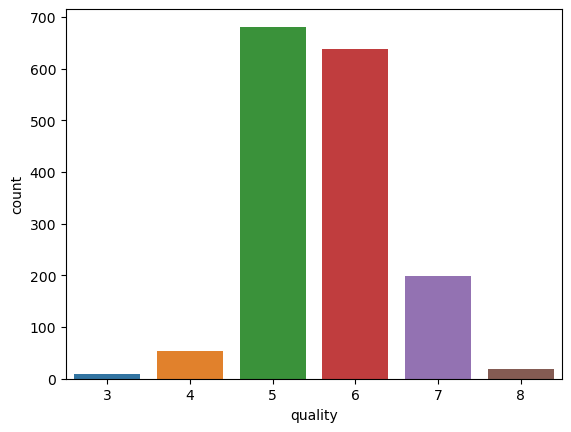

In [187]:
sns.countplot(data=wine_data,x='quality')
plt.show()

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

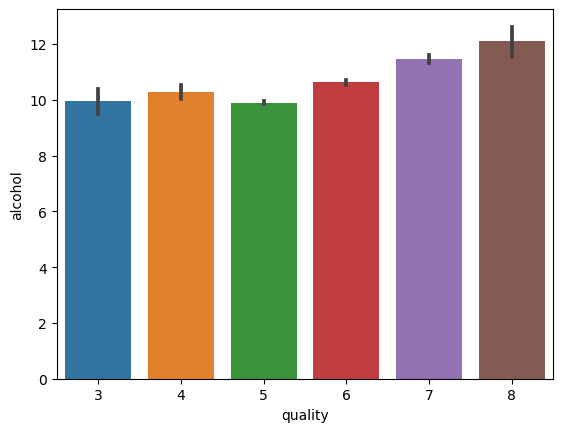

In [188]:
sns.barplot(data=wine_data,x='quality',y='alcohol')

<AxesSubplot:xlabel='quality', ylabel='residual sugar'>

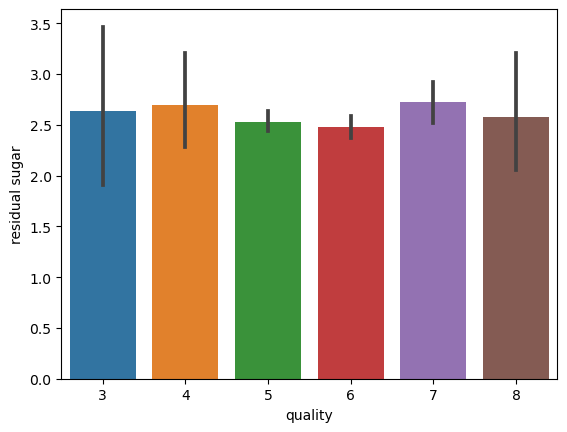

In [189]:
sns.barplot(data=wine_data,x='quality',y='residual sugar')

In [190]:
# we check outliers 

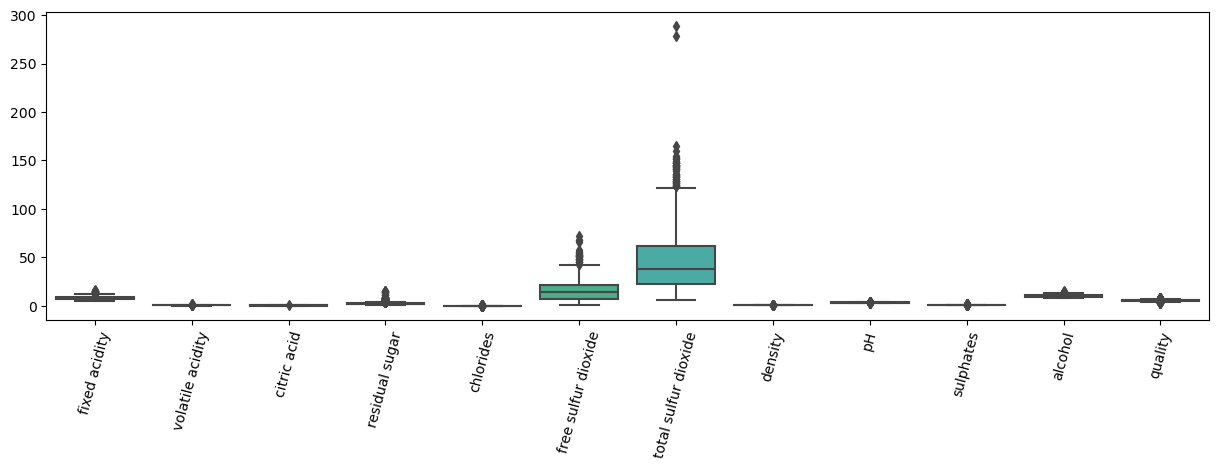

In [191]:
plt.figure(figsize=(15,4))
sns.boxplot(data=wine_data)
plt.xticks(rotation=75)
plt.show()

In [192]:
# we have outliers 

In [193]:
corr=wine_data.corr()

In [194]:
corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


<AxesSubplot:>

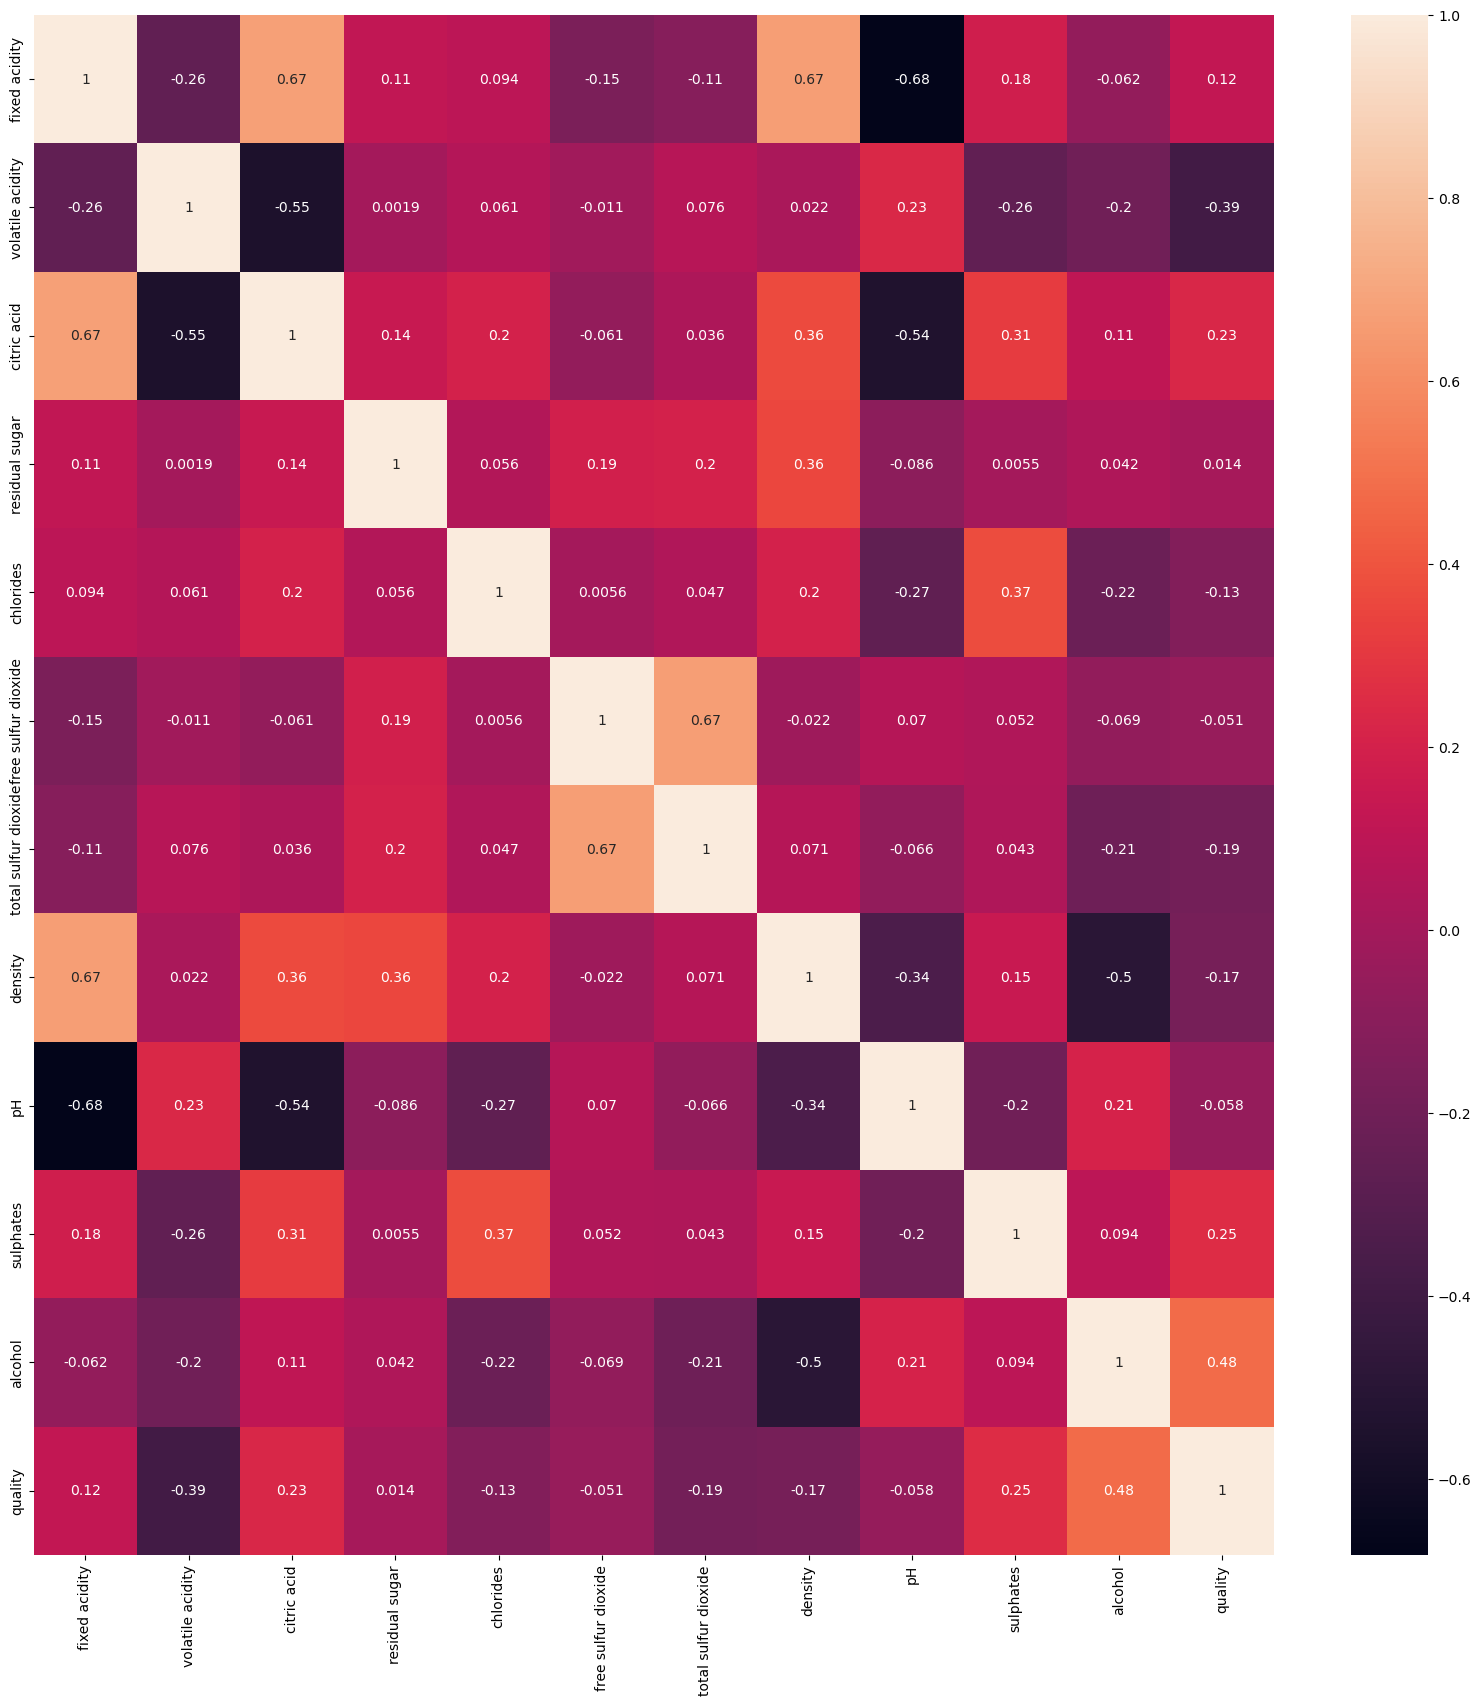

In [195]:
plt.figure(figsize=(20,20))
sns.heatmap(data=corr,annot=True)

In [196]:
# Data Preprocessing 

In [198]:
wine_data['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [201]:
wine_data.replace({3:0,4:0,5:0,6:0,7:0,8:1},inplace=True)


In [202]:
X=wine_data.drop(['quality'],axis=1)
y=wine_data['quality']

In [203]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=10)

In [204]:
X_train.shape

(1279, 11)

In [205]:
X_test.shape

(320, 11)

In [206]:
from sklearn.linear_model import LogisticRegression

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
# ensemble learning algorithm- bagging family
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier

In [207]:
lr=LogisticRegression()
knn=KNeighborsClassifier()
svc=SVC()
gnb=GaussianNB()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()
bc=BaggingClassifier()

In [208]:
for model in [lr,knn,svc,gnb,dt,gnb,dt,rf,bc]:
    print('*****************************************************************')
    print('*****************************************************************',model)
    print('*****************************************************************')
    abc=model.fit(X_train,y_train)
    predict_train=abc.predict(X_train)
    predict_test=abc.predict(X_test)   
    Astrain=accuracy_score(y_train,predict_train)
    Astest=accuracy_score(y_test,predict_test) 
    print("training Accuracy score \n" ,Astrain)
    print("=========="*3)
    print("testing Accuracy score \n" ,Astest)

*****************************************************************
***************************************************************** LogisticRegression()
*****************************************************************


C:\Users\USER\.dotnet\ANACONDA\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


training Accuracy score 
 0.9921813917122753
testing Accuracy score 
 0.975
*****************************************************************
***************************************************************** KNeighborsClassifier()
*****************************************************************
training Accuracy score 
 0.9921813917122753
testing Accuracy score 
 0.975
*****************************************************************
***************************************************************** SVC()
*****************************************************************
training Accuracy score 
 0.9921813917122753
testing Accuracy score 
 0.975
*****************************************************************
***************************************************************** GaussianNB()
*****************************************************************
training Accuracy score 
 0.9710711493354183
testing Accuracy score 
 0.934375
*********************************************************